# Importing some basic libraries

In [1]:
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")

import numpy as np # Linear algebra
import pandas as pd # Data processing, csv i/p o/p
import matplotlib.pyplot as plt # Data visualization
%matplotlib inline
import seaborn as sns # Data visualization

# Loading datasets

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
print("Training Dataset shape : ", df_train.shape)
df_train.sample(5)

Training Dataset shape :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


# Analyzing Training Data

In [4]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Attributes 
- Survival - Survival (0 = No; 1 = Yes)
- PassengerId-Passengers ID
- Class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S =  Southampton)

### Catagorical Features
#### Samples are classified into similar sets
#### Within catagorical we have Nominal, Ordinal, Ratio, Interval based 
- Survived
- Sex
- Embarked
- Pclass (Ordinal)

### Numerical Features
#### Values change from sample to sample
#### Within Numerical we have Discrete, Continuous, timeseries
- Age
- Fare
- Sibsp (Discrete)
- Parch (Discrete)

In [6]:
print('Number of Null/ Na/ Nan values in features of Train data : \n', df_train.isna().sum())

Number of Null/ Na/ Nan values in features of Train data : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Features containing Null or empty values
#### Training Data
Cabin > Age > Embarked

### Data typese of various features 
- Seven features are int or float.
- Five features are string(object).

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# include the object data types
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Mrs. William (Margaret Norton)",male,347082,B96 B98,S
freq,1,577,7,4,644


### About Features
- Total train samples are 891.
- Survived (Dependent Variable) is a catagorical feature of 0 or 1 values.
- About 38% survived according to the table.
- Mean age of passengers is 29.
- There were about 577 male out of 891 passengers 65%
- In Embarked there were 3 possibilities and S was used by most of them (644 out of 889)
- Unique tickets were 681 about 22% were duplicates

In [9]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# Visualizing data

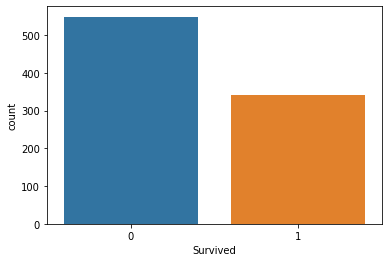

In [10]:
sns.countplot(df_train['Survived'])

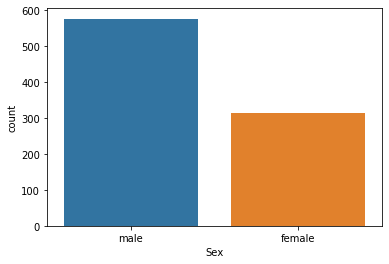

In [11]:
sns.countplot(df_train['Sex'])

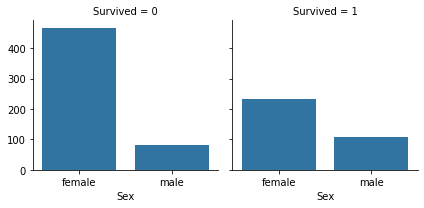

In [12]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.countplot, 'Sex')

- According to the plotted graph we can say that there are more deaths than survived.
- There are more males than females who travelled
- But the number of females survived is much more than males

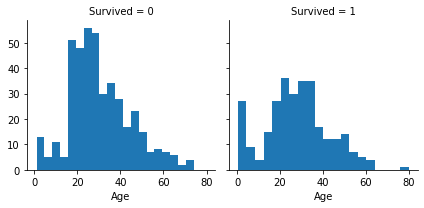

In [13]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Observations 
- Infants of age < 4 had high survival rate
- Oldest passenger survived (age = 80)
- Age 20-30 had high fatality
- Most passengers are in the range of 15-35 age

### Conclusion
- We should condider age feature in our model
- Fill the missing value in age using avg of age.

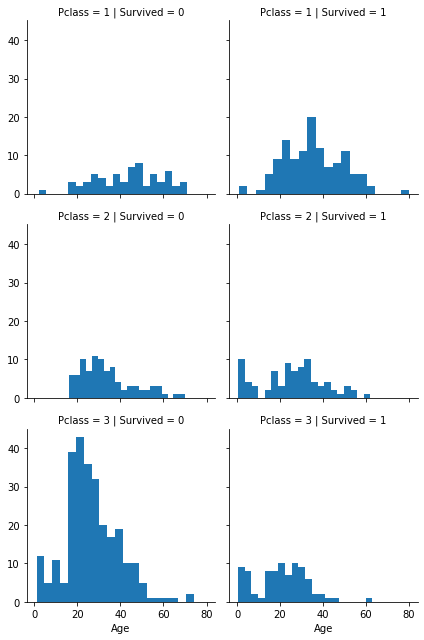

In [14]:
g = sns.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20)

### Observations
- Pclass 3 had the most number of passenger but many didnt survive
- Infants of Pclass 3 and 2 mostly survived.
- Most passenger of Pclass 1 survived

### Conclusion 
- We shold consider Pclass feature for model prediction

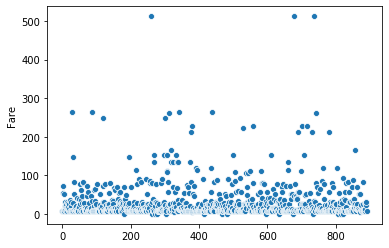

In [15]:
sns.scatterplot(np.arange(0,df_train.shape[0]),df_train['Fare'])

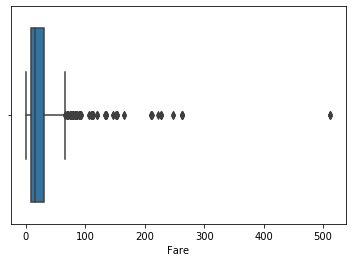

In [16]:
sns.boxplot(df_train['Fare'])

### Observations
- Fare has few numbers of outliers
- Its correlation with survived is significant

### Conclusion
- We consider Fare for prediction of model
- We should scale the data

# Data Preprocessing

In [17]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Feature Selection

In [18]:
print('Before Dropping Cols \nShape of Train Data : ', df_train.shape)
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
print('After Dropping Cols \nShape of Train Data : ', df_train.shape)

Before Dropping Cols 
Shape of Train Data :  (891, 12)
After Dropping Cols 
Shape of Train Data :  (891, 8)


- Dropped Columns PassendId, Name, Ticket, Cabin as they were insignificant features

In [19]:
df_train = df_train.fillna({'Age' : df_train['Age'].mean()})

In [20]:
df_train = df_train.dropna()

- Filled the missing values in age with the mean of age.
- Dropped 2 col in Train Data due to missing value

In [21]:
print('After Dropping Missing values \nShape of Train Data : ', df_train.shape)

After Dropping Missing values 
Shape of Train Data :  (889, 8)


### Label Encoding
- Converting Sex and Embarked to numbers from string

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

In [24]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


# Model

In [25]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(622, 7) (622,) (267, 7) (267,)


## Importing metrics to check accuracy

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Logistic Regression
- It measures the relationship between the catagorical dependent variable (o/p feature) and one or more than one independent variable (i/p features).
- It estimates the probability using sigmoid function.

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_logreg_pred = logreg.predict(X_test)

In [28]:
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       154
           1       0.78      0.71      0.74       113

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [29]:
confusion_matrix(y_test, y_logreg_pred)

array([[131,  23],
       [ 33,  80]])

In [30]:
accuracy_score(y_test, y_logreg_pred) * 100

79.02621722846442

In [41]:
logreg.score(X_train, y_train) * 100

81.02893890675242

## Support Vector Machines
- It is a supervised learning model with associated learning algorithms that analyze data used for classification and regression analysis.
- Classifies using hyper-planes

In [31]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)

In [32]:
print(classification_report(y_test, y_svc_pred))

              precision    recall  f1-score   support

           0       0.63      0.88      0.74       154
           1       0.65      0.30      0.41       113

    accuracy                           0.64       267
   macro avg       0.64      0.59      0.57       267
weighted avg       0.64      0.64      0.60       267



In [33]:
confusion_matrix(y_test, y_svc_pred)

array([[136,  18],
       [ 79,  34]])

In [34]:
accuracy_score(y_test, y_svc_pred) * 100

63.670411985018724

In [35]:
svc.score(X_train, y_train) * 100

69.61414790996785

## K-Nearest Neighbour (KNN)
- It is a non-parametric method used for classification.
- A sample is classified by a majority vote of its neighbors

In [36]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3) # k=3 just as a start, Pclass is also 3
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)

In [37]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       154
           1       0.66      0.55      0.60       113

    accuracy                           0.69       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.69      0.69      0.68       267



In [38]:
confusion_matrix(y_test, y_knn_pred)

array([[122,  32],
       [ 51,  62]])

In [39]:
accuracy_score(y_test, y_knn_pred) * 100

68.91385767790263

In [40]:
knn.score(X_train, y_train) * 100

84.56591639871382

## Naive Bayes
- Using Gaussian Naive Bayes as the dependent variable is binary catagorical.
- It requires a lot of independent variable for better predition.
- It uses probability for prediction. 

In [42]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_nb_pred = gaussian.predict(X_test)

In [43]:
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       154
           1       0.72      0.73      0.73       113

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [44]:
confusion_matrix(y_test, y_nb_pred)

array([[122,  32],
       [ 30,  83]])

In [45]:
accuracy_score(y_test, y_nb_pred) * 100

76.77902621722846

In [46]:
gaussian.score(X_train, y_train) * 100

79.90353697749197

## Decision Tree 
- This uses decision tree as a predictive model which maps features (tree branches) to conclusion about the target value (tree leaves).
- Models where target value is a fintie set of values are called classification trees.

In [47]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_dt_pred = decision_tree.predict(X_test)

In [48]:
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       154
           1       0.70      0.72      0.71       113

    accuracy                           0.75       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.75      0.75      0.75       267



In [49]:
confusion_matrix(y_test, y_dt_pred)

array([[120,  34],
       [ 32,  81]])

In [50]:
accuracy_score(y_test, y_dt_pred) * 100

75.28089887640449

In [51]:
decision_tree.score(X_train, y_train) * 100

98.71382636655949

## Random Forest
- It is a very popular ensemble learning method for classification.
- It construct a number of Decision Trees and prints the mode of the classification.

In [52]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_rf_pred = random_forest.predict(X_test)

In [53]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       154
           1       0.76      0.73      0.74       113

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



In [54]:
confusion_matrix(y_test, y_rf_pred)

array([[128,  26],
       [ 31,  82]])

In [55]:
accuracy_score(y_test, y_rf_pred) * 100

78.65168539325843

In [56]:
random_forest.score(X_train, y_train) * 100

98.71382636655949